<a href="https://colab.research.google.com/github/Bovi-analytics/Hut-et-al-2021/blob/master/EatingTime_MonthsInMilk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical notebook for eating time MonthsInMilk

## Importing of google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## R loading

In [ ]:
%reload_ext rpy2.ipython

In [ ]:
%%R
lib_loc <- "/content/drive/Shareddrives/Bovi-Analytics/R-lib/"

In [ ]:
%%R
package_list <- c("ggplot2",
                  "readr",
                  "plyr",
                  "dplyr",
                  "tidyr",                
                  "lme4",
                  "lmerTest",
                  "multcompView",
                  "mvtnorm",
                  "TH.data",
                  "multcomp",
                  "emmeans",
                  "lsmeans",
                  "carData",
                  "car"
                  )

for (pkg in package_list) {
  if (pkg %in% rownames(.packages()) == FALSE)
  {library(pkg, lib.loc = lib_loc, character.only = TRUE)}

}

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


R[write to console]: The following object is masked from ‘package:ggplot2’:

    vars


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘Matrix’


R[write to console]: The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


R[write to console]: 
Attaching package: ‘lmerTest’


R[write to console]: The following object is masked from ‘package:lme4’:

    lmer


R[write to console]: The following object is masked from ‘package:stats’:

    step


R[write to console]: Loading required package: surviv

## Data loading into dataframe

In [ ]:
%%R
url = ('/content/drive/Shareddrives/Bovi-Analytics/Projects/SenseOfSensors/CsvData/SensorAggRepartitioned08032021/ObservationType=EatingTimeMinutesPerDay/part-00000-tid-183333261268000902-29b42dfd-564e-4e7d-8ea7-05b4fb30d5d6-1694-6.c000.csv')

dataset = read.csv(url)



In [ ]:
%%R

#path <- "/content/drive/Shareddrives/Bovi-Analytics/Projects/SenseOfSensors/CsvData/SensorAggRepartitioned08032021/ObservationType=EatingTimeMinutesPerDay/part-00000-tid-183333261268000902-29b42dfd-564e-4e7d-8ea7-05b4fb30d5d6-1694-6.c000.csv"
AnalysisData <- 
  readr::read_csv("/content/drive/Shareddrives/Bovi-Analytics/Projects/SenseOfSensors/CsvData/SensorAggRepartitioned08032021/ObservationType=EatingTimeMinutesPerDay/part-00000-tid-183333261268000902-29b42dfd-564e-4e7d-8ea7-05b4fb30d5d6-1694-6.c000.csv", 
    col_types = readr::cols(HerdIdentifier = readr::col_character(), 
        TransitionLactationNumber = readr::col_integer(), 
        TransitionParity = readr::col_character(), 
        TransitionMonthsInMilk = readr::col_integer(), 
        TransitionCalvingDate = readr::col_character(), 
        Hour = readr::col_integer(), 
        Observations = readr::col_integer())) %>% 
  dplyr::filter(dplyr::between(TransitionMonthsInMilk, -1, 10)) %>%
   dplyr::mutate(
    AnimalIdentifier = factor(AnimalIdentifier),
    HerdIdentifier = factor(HerdIdentifier),
    Parity = factor(TransitionParity),
    LactationNumber = factor(TransitionLactationNumber),
    MonthsInMilk = factor(TransitionMonthsInMilk),
    numMonthsInMilk = TransitionMonthsInMilk,
    CalvingSeason = factor(TransitionSeason),
    Hour = factor(Hour),
    SensorValue = ObservationValue,
    MilkingType = factor(case_when(
    HerdIdentifier %in% c("544", "2514", "3314")~"AMS",
    TRUE~"CMS"
  ))
  ) %>%
  dplyr::select(AnimalIdentifier, HerdIdentifier, Parity, MonthsInMilk, numMonthsInMilk, CalvingSeason, Hour, SensorValue, MilkingType, LactationNumber) %>%
  tidyr::drop_na()

In [ ]:
%%R
head(AnalysisData)

# A tibble: 6 × 10
  AnimalIdentifier HerdIdentifier Parity MonthsInMilk numMonthsInMilk
  <fct>            <fct>          <fct>  <fct>                  <int>
1 10               2746           2      -1                        -1
2 92               3              1      1                          1
3 8127             2011           3+     7                          7
4 10               2746           1      8                          8
5 8553             2011           2      2                          2
6 92               3              3+     0                          0
# … with 5 more variables: CalvingSeason <fct>, Hour <fct>, SensorValue <dbl>,
#   MilkingType <fct>, LactationNumber <fct>


In [ ]:
%%R
str(AnalysisData)

tibble [42,548 × 10] (S3: tbl_df/tbl/data.frame)
 $ AnimalIdentifier: Factor w/ 1100 levels "1","2","3","4",..: 10 92 749 10 873 92 130 22 72 352 ...
 $ HerdIdentifier  : Factor w/ 8 levels "2011","2297",..: 4 5 1 4 1 5 7 4 6 8 ...
 $ Parity          : Factor w/ 3 levels "1","2","3+": 2 1 3 1 2 3 1 1 3 3 ...
 $ MonthsInMilk    : Factor w/ 12 levels "-1","0","1","2",..: 1 3 9 10 4 2 1 5 6 1 ...
 $ numMonthsInMilk : int [1:42548] -1 1 7 8 2 0 -1 3 4 -1 ...
 $ CalvingSeason   : Factor w/ 4 levels "Autumn","Spring",..: 4 1 4 1 3 1 2 4 1 1 ...
 $ Hour            : Factor w/ 1 level "0": 1 1 1 1 1 1 1 1 1 1 ...
 $ SensorValue     : num [1:42548] 505 315 334 483 442 ...
 $ MilkingType     : Factor w/ 2 levels "AMS","CMS": 2 2 2 2 2 2 1 2 1 2 ...
 $ LactationNumber : Factor w/ 13 levels "1","2","3","4",..: 2 1 5 1 2 7 1 1 5 12 ...


## Descriptive statistics

In [ ]:
%%R
AnalysisData %>%
  group_by(Parity) %>%
  summarise(Unique_Elements = n_distinct(AnimalIdentifier))

# A tibble: 3 × 2
  Parity Unique_Elements
  <fct>            <int>
1 1                  704
2 2                  693
3 3+                 733


In [ ]:
%%R
AnalysisData %>%
  summarise(Unique_Elements = n_distinct(AnimalIdentifier))

# A tibble: 1 × 1
  Unique_Elements
            <int>
1            1074


In [ ]:
%%R
AnalysisData %>%
  group_by(LactationNumber) %>%
  summarise(Unique_Elements = n_distinct(AnimalIdentifier))

# A tibble: 13 × 2
   LactationNumber Unique_Elements
   <fct>                     <int>
 1 1                           704
 2 2                           693
 3 3                           612
 4 4                           476
 5 5                           333
 6 6                           202
 7 7                            94
 8 8                            44
 9 9                            22
10 10                           11
11 11                            6
12 12                            2
13 13                            2


In [ ]:
%%R
AnalysisData %>%
  group_by(AnimalIdentifier, LactationNumber) %>%
  summarise(Unique_Elements = n_distinct(AnimalIdentifier))

`summarise()` has grouped output by 'AnimalIdentifier'. You can override using the `.groups` argument.
# A tibble: 3,201 × 3
# Groups:   AnimalIdentifier [1,074]
   AnimalIdentifier LactationNumber Unique_Elements
   <fct>            <fct>                     <int>
 1 1                1                             1
 2 1                2                             1
 3 1                3                             1
 4 1                4                             1
 5 1                5                             1
 6 1                6                             1
 7 1                7                             1
 8 2                1                             1
 9 2                2                             1
10 2                3                             1
# … with 3,191 more rows


# Model building

First we determine the null model

## Null model

In [ ]:
%%R
Model.0 <- lme4::lmer(
                  SensorValue ~ 1 + (1 + numMonthsInMilk|AnimalIdentifier), 
                  data = AnalysisData,
                  REML = FALSE
                  )


## Univariable models

In [ ]:
%%R
Model1.0 <- lme4::lmer(
                  SensorValue ~ 
                  MonthsInMilk + 
                  (1 + numMonthsInMilk|AnimalIdentifier),
                  REML = FALSE,
                  data = AnalysisData
)
anova(Model.0,Model1.0,test="Chisq")

Data: AnalysisData
Models:
Model.0: SensorValue ~ 1 + (1 + numMonthsInMilk | AnimalIdentifier)
Model1.0: SensorValue ~ MonthsInMilk + (1 + numMonthsInMilk | AnimalIdentifier)
         npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)    
Model.0     5 488327 488370 -244158   488317                         
Model1.0   16 487724 487862 -243846   487692 625.32 11  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
Model1.1 <- lme4::lmer(
                  SensorValue ~ 
                  Parity + 
                  (1 + numMonthsInMilk|AnimalIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )
anova(Model.0,Model1.1,test="Chisq")

Data: AnalysisData
Models:
Model.0: SensorValue ~ 1 + (1 + numMonthsInMilk | AnimalIdentifier)
Model1.1: SensorValue ~ Parity + (1 + numMonthsInMilk | AnimalIdentifier)
         npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)    
Model.0     5 488327 488370 -244158   488317                         
Model1.1    7 484939 484999 -242462   484925 3392.3  2  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
Model1.2 <- lme4::lmer(
                  SensorValue ~ 
                  CalvingSeason +
                  (1 + numMonthsInMilk|AnimalIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )
anova(Model.0,Model1.2,test="Chisq")

Data: AnalysisData
Models:
Model.0: SensorValue ~ 1 + (1 + numMonthsInMilk | AnimalIdentifier)
Model1.2: SensorValue ~ CalvingSeason + (1 + numMonthsInMilk | AnimalIdentifier)
         npar    AIC    BIC  logLik deviance Chisq Df Pr(>Chisq)    
Model.0     5 488327 488370 -244158   488317                        
Model1.2    8 488291 488360 -244137   488275 42.06  3  3.897e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
Model1.3 <- lme4::lmer(
                  SensorValue ~ 
                  MilkingType +
                  (1 + numMonthsInMilk|AnimalIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )
anova(Model.0,Model1.3,test="Chisq")

Data: AnalysisData
Models:
Model.0: SensorValue ~ 1 + (1 + numMonthsInMilk | AnimalIdentifier)
Model1.3: SensorValue ~ MilkingType + (1 + numMonthsInMilk | AnimalIdentifier)
         npar    AIC    BIC  logLik deviance Chisq Df Pr(>Chisq)    
Model.0     5 488327 488370 -244158   488317                        
Model1.3    6 488070 488122 -244029   488058   259  1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Multivariable models

In [ ]:
%%R
Model2.0 <- lme4::lmer(
                  SensorValue ~ 
                  Parity + MonthsInMilk + CalvingSeason + MilkingType + HerdIdentifier +
                  (1 + numMonthsInMilk|AnimalIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )

R[write to console]: fixed-effect model matrix is rank deficient so dropping 1 column / coefficient



In [ ]:
%%R
drop1(Model2.0,test="Chisq")

Single term deletions

Model:
SensorValue ~ Parity + MonthsInMilk + CalvingSeason + MilkingType + 
    (1 + numMonthsInMilk | HerdIdentifier/AnimalIdentifier)
              npar    AIC     LRT   Pr(Chi)    
<none>             474314                      
Parity           2 477103 2793.12 < 2.2e-16 ***
MonthsInMilk    11 474760  467.81 < 2.2e-16 ***
CalvingSeason    3 474329   21.00 0.0001054 ***
MilkingType      1 474316    4.30 0.0380258 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Introduction of interactions

### Interactions with MonthsInMilk

In [ ]:
%%R
Model2.1 <- lme4::lmer(
                  SensorValue ~ 
                  MonthsInMilk*Parity + CalvingSeason + MilkingType +
                 (1 + numMonthsInMilk| HerdIdentifier/AnimalIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )
anova(Model2.0,Model2.1,test="Chisq")

Data: AnalysisData
Models:
Model2.0: SensorValue ~ Parity + MonthsInMilk + CalvingSeason + MilkingType + 
Model2.0:     HerdIdentifier + (1 + numMonthsInMilk | AnimalIdentifier)
Model2.1: SensorValue ~ MonthsInMilk * Parity + CalvingSeason + MilkingType + 
Model2.1:     (1 + numMonthsInMilk | HerdIdentifier/AnimalIdentifier)
         npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)    
Model2.0   28 482240 482483 -241092   482184                         
Model2.1   47 472952 473359 -236429   472858 9326.4 19  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
Model2.2 <- lme4::lmer(
                  SensorValue ~ 
                  MonthsInMilk*MilkingType + CalvingSeason + Parity +
                  (1 + numMonthsInMilk| HerdIdentifier/AnimalIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )
anova(Model2.0,Model2.2,test="Chisq")

Data: AnalysisData
Models:
Model2.0: SensorValue ~ Parity + MonthsInMilk + CalvingSeason + MilkingType + 
Model2.0:     (1 + numMonthsInMilk | HerdIdentifier/AnimalIdentifier)
Model2.2: SensorValue ~ MonthsInMilk * MilkingType + CalvingSeason + Parity + 
Model2.2:     (1 + numMonthsInMilk | HerdIdentifier/AnimalIdentifier)
         npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)    
Model2.0   25 474314 474530 -237132   474264                         
Model2.2   36 474284 474596 -237106   474212 51.306 11   3.64e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
Model2.3 <- lme4::lmer(
                  SensorValue ~ 
                  MonthsInMilk*CalvingSeason + Parity + MilkingType +
                  (1 + numMonthsInMilk| HerdIdentifier/AnimalIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )
anova(Model2.0,Model2.3,test="Chisq")

Data: AnalysisData
Models:
Model2.0: SensorValue ~ Parity + MonthsInMilk + CalvingSeason + MilkingType + 
Model2.0:     (1 + numMonthsInMilk | HerdIdentifier/AnimalIdentifier)
Model2.3: SensorValue ~ MonthsInMilk * CalvingSeason + Parity + MilkingType + 
Model2.3:     (1 + numMonthsInMilk | HerdIdentifier/AnimalIdentifier)
         npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)    
Model2.0   25 474314 474530 -237132   474264                         
Model2.3   58 473824 474326 -236854   473708 555.69 33  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Multiple interactions

In [ ]:
%%R
Model2.4 <- lme4::lmer(
                  SensorValue ~ 
                  MonthsInMilk*CalvingSeason + 
                  MonthsInMilk*Parity + 
                  MonthsInMilk*MilkingType +
                  (1 + numMonthsInMilk| HerdIdentifier/AnimalIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )
anova(Model2.0,Model2.4,test="Chisq")

Data: AnalysisData
Models:
Model2.0: SensorValue ~ Parity + MonthsInMilk + CalvingSeason + MilkingType + 
Model2.0:     (1 + numMonthsInMilk | HerdIdentifier/AnimalIdentifier)
Model2.4: SensorValue ~ MonthsInMilk * CalvingSeason + MonthsInMilk * Parity + 
Model2.4:     MonthsInMilk * MilkingType + (1 + numMonthsInMilk | HerdIdentifier/AnimalIdentifier)
         npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)    
Model2.0   25 474314 474530 -237132   474264                         
Model2.4   91 472411 473199 -236114   472229 2035.1 66  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
Model2.5 <- lme4::lmer(
                  SensorValue ~ 
                  MonthsInMilk*CalvingSeason + 
                  MonthsInMilk*Parity + 
                  MonthsInMilk*HerdIdentifier +
                  (1 + numMonthsInMilk|AnimalIdentifier),
                  REML = FALSE,
                  data = AnalysisData
                  )
anova(Model2.0,Model2.5,test="Chisq")

Data: AnalysisData
Models:
Model2.0: SensorValue ~ Parity + MonthsInMilk + CalvingSeason + MilkingType + 
Model2.0:     HerdIdentifier + (1 + numMonthsInMilk | AnimalIdentifier)
Model2.5: SensorValue ~ MonthsInMilk * CalvingSeason + MonthsInMilk * Parity + 
Model2.5:     MonthsInMilk * HerdIdentifier + (1 + numMonthsInMilk | AnimalIdentifier)
         npar    AIC    BIC  logLik deviance  Chisq  Df Pr(>Chisq)    
Model2.0   28 482240 482483 -241092   482184                          
Model2.5  160 479860 481245 -239770   479540 2644.9 132  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
summary(Model2.5)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: SensorValue ~ MonthsInMilk * CalvingSeason + MonthsInMilk * Parity +  
    MonthsInMilk * HerdIdentifier + (1 + numMonthsInMilk | AnimalIdentifier)
   Data: AnalysisData

      AIC       BIC    logLik  deviance  df.resid 
 479859.5  481244.9 -239769.8  479539.5     42388 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.2341 -0.5051  0.0499  0.5952  5.9509 

Random effects:
 Groups           Name            Variance Std.Dev. Corr 
 AnimalIdentifier (Intercept)     1759.321 41.944        
                  numMonthsInMilk    6.582  2.566   -0.13
 Residual                         4271.161 65.354        
Number of obs: 42548, groups:  AnimalIdentifier, 1074

Fixed effects:
                                    Estimate Std. Error t value
(Intercept)                         258.5601     4.7218  54.758
MonthsInMilk0                        25.2860     5.3209   4.752
MonthsInMilk1                        59.1881   

R[write to console]: 
Correlation matrix not shown by default, as p = 156 > 12.
Use print(object, correlation=TRUE)  or
    vcov(object)        if you need it




In [ ]:
%%R
finalModel <- Model2.5
Modeldrop <- drop1(finalModel, test="Chisq")
if("Pr(>F)" %in% colnames(Modeldrop))
{
  Pvalues <- Modeldrop$`Pr(>F)`
} else 
{
  Pvalues <- Modeldrop$`Pr(Chi)`
}
Modeldrop

Single term deletions

Model:
SensorValue ~ MonthsInMilk * CalvingSeason + MonthsInMilk * Parity + 
    MonthsInMilk * HerdIdentifier + (1 + numMonthsInMilk | AnimalIdentifier)
                            npar    AIC     LRT   Pr(Chi)    
<none>                           479860                      
MonthsInMilk:CalvingSeason    33 480264  470.88 < 2.2e-16 ***
MonthsInMilk:Parity           22 481149 1333.68 < 2.2e-16 ***
MonthsInMilk:HerdIdentifier   77 480599  893.53 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
save(finalModel, file="/content/drive/Shareddrives/Bovi-Analytics/Projects/SenseOfSensors/CsvData/SensorAggRepartitioned08032021/finalmodeleatingtime.rdata")

In [ ]:
%%R
load(file="/content/drive/Shareddrives/Bovi-Analytics/Projects/SenseOfSensors/CsvData/SensorAggRepartitioned08032021/finalmodeleatingtime.rdata")

# Final model analysis of variance

In [ ]:
%%R
Anova(finalModel)

Analysis of Deviance Table (Type II Wald chisquare tests)

Response: SensorValue
                               Chisq Df Pr(>Chisq)    
MonthsInMilk                 654.811 11  < 2.2e-16 ***
CalvingSeason                 20.903  3  0.0001103 ***
Parity                      3946.019  2  < 2.2e-16 ***
HerdIdentifier              2499.838  7  < 2.2e-16 ***
MonthsInMilk:CalvingSeason   473.851 33  < 2.2e-16 ***
MonthsInMilk:Parity         1356.989 22  < 2.2e-16 ***
MonthsInMilk:HerdIdentifier  907.170 77  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Final model figures and LSM (95% CI)

## Main effects

In [ ]:
%%R
multcomp::cld(lsmeans::lsmeans(finalModel, ~ MonthsInMilk), alpha=0.05, Letters=letters, adjust="tukey")

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 42548' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 42548' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: NOTE: Results may be misleading due to involvement in interactions

R[write to console]: Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



 MonthsInMilk lsmean   SE  df asymp.LCL asymp.UCL .group  
 1               320 2.19 Inf       314       326  a      
 0               325 2.16 Inf       319       331  ab     
 -1              329 2.28 Inf       322       335   bc    
 2               332 2.17 Inf       325       338    c    
 3               339 2.17 Inf       332       345     d   
 4               343 2.18 Inf       336       349     de  
 10              345 2.38 Inf       338       352      ef 
 5               348 2.20 Inf       342       354      efg
 9               349 2.33 Inf       342       355      efg
 8               349 2.28 Inf       343       356       fg
 6               350 2.22 Inf       344       357       fg
 7               351 2.25 Inf       345       358        g

Results are averaged over the levels of: CalvingSeason, Parity, HerdIdentifier 
Degrees-of-freedom method: asymptotic 
Confidence level used: 0.95 
Conf-level adjustment: sidak method for 12 estimates 
P value adjustment: tukey meth

In [ ]:
%%R
multcomp::cld(lsmeans::lsmeans(finalModel, ~ Parity), alpha=0.05, Letters=letters, adjust="tukey")

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 42548' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 42548' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: NOTE: Results may be misleading due to involvement in interactions

R[write to console]: Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



 Parity lsmean   SE  df asymp.LCL asymp.UCL .group
 3+        308 1.89 Inf       304       313  a    
 1         354 1.97 Inf       350       359   b   
 2         357 1.94 Inf       353       362    c  

Results are averaged over the levels of: MonthsInMilk, CalvingSeason, HerdIdentifier 
Degrees-of-freedom method: asymptotic 
Confidence level used: 0.95 
Conf-level adjustment: sidak method for 3 estimates 
P value adjustment: tukey method for comparing a family of 3 estimates 
significance level used: alpha = 0.05 


In [ ]:
%%R
multcomp::cld(lsmeans::lsmeans(finalModel, ~ CalvingSeason), alpha=0.05, Letters=letters, adjust="tukey")

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 42548' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 42548' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: NOTE: Results may be misleading due to involvement in interactions

R[write to console]: Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



 CalvingSeason lsmean   SE  df asymp.LCL asymp.UCL .group
 Summer           337 1.96 Inf       332       342  a    
 Autumn           339 1.97 Inf       334       344  ab   
 Winter           341 2.00 Inf       336       346   bc  
 Spring           342 2.00 Inf       337       347    c  

Results are averaged over the levels of: MonthsInMilk, Parity, HerdIdentifier 
Degrees-of-freedom method: asymptotic 
Confidence level used: 0.95 
Conf-level adjustment: sidak method for 4 estimates 
P value adjustment: tukey method for comparing a family of 4 estimates 
significance level used: alpha = 0.05 


In [ ]:
%%R
multcomp::cld(lsmeans::lsmeans(finalModel, ~ MilkingType), alpha=0.05, Letters=letters, adjust="tukey")

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 42548' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 42548' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Error in emmfcn(...) : 
  No variable named MilkingType in the reference grid

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv,  :
R[write to console]: 
 
R[write t


Error in emmfcn(...) : 
  No variable named MilkingType in the reference grid


RInterpreterError: ignored

## Interactions

### MonthsInMilk by parity

In [ ]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ MonthsInMilk|Parity, type = "response", glhargs=list())
multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="tukey")
confint(LSMs$contrasts)

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 42548' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 42548' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



Parity = 1:
 contrast  estimate   SE  df asymp.LCL asymp.UCL
 (-1) - 0  -20.8286 3.57 Inf   -32.498   -9.1591
 (-1) - 1  -29.3407 3.63 Inf   -41.217  -17.4646
 (-1) - 2  -42.8967 3.62 Inf   -54.723  -31.0701
 (-1) - 3  -59.1515 3.62 Inf   -70.968  -47.3354
 (-1) - 4  -69.5615 3.63 Inf   -81.438  -57.6852
 (-1) - 5  -80.1094 3.67 Inf   -92.111  -68.1079
 (-1) - 6  -85.3439 3.71 Inf   -97.473  -73.2145
 (-1) - 7  -87.3038 3.75 Inf   -99.567  -75.0406
 (-1) - 8  -87.5880 3.79 Inf   -99.985  -75.1915
 (-1) - 9  -88.8587 3.84 Inf  -101.411  -76.3064
 (-1) - 10 -86.6713 3.88 Inf   -99.344  -73.9983
 0 - 1      -8.5120 3.17 Inf   -18.870    1.8459
 0 - 2     -22.0681 3.15 Inf   -32.355  -11.7813
 0 - 3     -38.3229 3.14 Inf   -48.580  -28.0653
 0 - 4     -48.7329 3.15 Inf   -59.040  -38.4259
 0 - 5     -59.2808 3.19 Inf   -69.715  -48.8464
 0 - 6     -64.5153 3.23 Inf   -75.077  -53.9532
 0 - 7     -66.4752 3.27 Inf   -77.172  -55.7784
 0 - 8     -66.7594 3.32 Inf   -77.593  -55.9257
 0 - 9  

In [ ]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ MonthsInMilk|Parity, type = "response", glhargs=list())
confint(LSMs$contrasts)

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 42548' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 42548' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.



Parity = 1:
 contrast  estimate   SE  df asymp.LCL asymp.UCL
 (-1) - 0  -20.8286 3.57 Inf   -32.498   -9.1591
 (-1) - 1  -29.3407 3.63 Inf   -41.217  -17.4646
 (-1) - 2  -42.8967 3.62 Inf   -54.723  -31.0701
 (-1) - 3  -59.1515 3.62 Inf   -70.968  -47.3354
 (-1) - 4  -69.5615 3.63 Inf   -81.438  -57.6852
 (-1) - 5  -80.1094 3.67 Inf   -92.111  -68.1079
 (-1) - 6  -85.3439 3.71 Inf   -97.473  -73.2145
 (-1) - 7  -87.3038 3.75 Inf   -99.567  -75.0406
 (-1) - 8  -87.5880 3.79 Inf   -99.985  -75.1915
 (-1) - 9  -88.8587 3.84 Inf  -101.411  -76.3064
 (-1) - 10 -86.6713 3.88 Inf   -99.344  -73.9983
 0 - 1      -8.5120 3.17 Inf   -18.870    1.8459
 0 - 2     -22.0681 3.15 Inf   -32.355  -11.7813
 0 - 3     -38.3229 3.14 Inf   -48.580  -28.0653
 0 - 4     -48.7329 3.15 Inf   -59.040  -38.4259
 0 - 5     -59.2808 3.19 Inf   -69.715  -48.8464
 0 - 6     -64.5153 3.23 Inf   -75.077  -53.9532
 0 - 7     -66.4752 3.27 Inf   -77.172  -55.7784
 0 - 8     -66.7594 3.32 Inf   -77.593  -55.9257
 0 - 9  

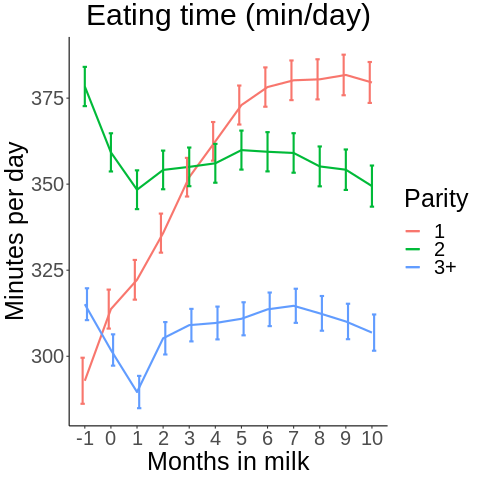

In [ ]:
%%R
dfPValues <- summary(LSMs)[[2]]
dfLMSs <- summary(LSMs)[[1]]
dfLMSs %>% 
  mutate(label = if_else(MonthsInMilk == max(as.numeric(MonthsInMilk)), as.character(Parity), NA_character_)) %>%
  ggplot(
  aes(
    x=MonthsInMilk,
    y=lsmean,
    group=Parity, 
    color=Parity)
    ) +
  geom_line(size=1) +  
  geom_errorbar(
    aes(ymin=asymp.LCL, 
        ymax=asymp.UCL), 
    width=.5,
    size=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Eating time (min/day)", 
    y="Minutes per day" , 
    x = "Months in milk") +
  theme_bw() +
  theme(text=element_text(size=25),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(), 
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), 
        axis.line = element_line(colour = "black"))


In [ ]:
%%R
ggsave("/content/drive/Shareddrives/Bovi-Analytics/Projects/SenseOfSensors/DiurnalPattern/Figures122021/EatingTimeParityByMonthsInMilk.png", width = 10, height = 8)

### MonthsInMilk by milking type

In [ ]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ HerdIdentifier|MonthsInMilk, type = "response", glhargs=list())
multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="tukey")

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 42548' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 42548' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



MonthsInMilk = -1:
 HerdIdentifier lsmean   SE  df asymp.LCL asymp.UCL .group 
 3314              287 4.87 Inf       273       300  a     
 2011              292 3.47 Inf       283       302  ab    
 2297              304 4.25 Inf       293       316   b    
 2514              327 3.89 Inf       317       338    c   
 544               328 4.07 Inf       317       340    c   
 3                 353 4.34 Inf       341       365     d  
 2746              354 4.15 Inf       342       365     d  
 5888              385 3.99 Inf       374       395      e 

MonthsInMilk = 0:
 HerdIdentifier lsmean   SE  df asymp.LCL asymp.UCL .group 
 2011              294 3.13 Inf       285       302  a     
 3314              295 4.58 Inf       282       307  ab    
 2514              309 3.76 Inf       299       320   bc   
 2297              310 4.06 Inf       299       321    c   
 544               328 3.98 Inf       318       339     d  
 3                 343 4.14 Inf       332       355      e 
 2

In [ ]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ MonthsInMilk|HerdIdentifier, type = "response", glhargs=list())
multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="tukey")

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 42548' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 42548' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



HerdIdentifier = 2011:
 MonthsInMilk lsmean   SE  df asymp.LCL asymp.UCL .group  
 -1              292 3.47 Inf       282       302  a      
 0               294 3.13 Inf       285       303  a      
 1               320 3.12 Inf       311       329   b     
 2               323 3.13 Inf       314       332   bc    
 3               330 3.12 Inf       321       339   bcd   
 10              334 3.44 Inf       324       344    cde  
 4               339 3.13 Inf       330       348     def 
 9               342 3.37 Inf       333       352      efg
 8               347 3.29 Inf       338       357       fg
 5               349 3.16 Inf       339       358       fg
 7               349 3.24 Inf       340       359       fg
 6               352 3.19 Inf       342       361        g

HerdIdentifier = 2297:
 MonthsInMilk lsmean   SE  df asymp.LCL asymp.UCL .group  
 2               301 4.21 Inf       289       313  a      
 -1              304 4.25 Inf       292       316  a      
 1       

In [ ]:
%%R
summary(LSMs)[[1]]

In [ ]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ MonthsInMilk|HerdIdentifier, type = "response", glhargs=list())

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 42548' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 42548' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.



In [ ]:
%%R
dfHerdIdentifier <- data.frame(HerdIdentifier = c("2011", "2297", "2514", "2746", "3", "3314", "544", "5888"),
                 Farm = c("CMS-P", "CMS-P", "AMS-C", "CMS-P", "CMS-P", "AMS-C", "AMS-C", "CMS-P")
                 )

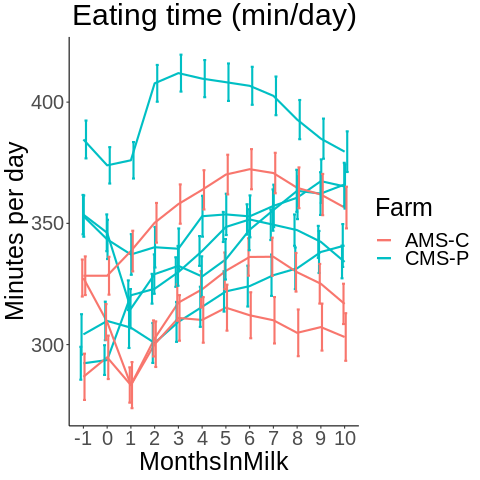

In [ ]:
%%R
dfLMSs <- summary(LSMs)[[1]]
dfLMSs %>% 
  dplyr::left_join(dfHerdIdentifier, by =  c("HerdIdentifier")) %>%
  mutate(label = if_else(MonthsInMilk == max(as.numeric(MonthsInMilk)), as.character(HerdIdentifier), NA_character_)) %>%
  ggplot(
  aes(
    x=MonthsInMilk,
    y=lsmean,
    group=HerdIdentifier, 
    color=Farm)
    ) +
  geom_line(size=1) +  
  geom_errorbar(
    aes(ymin=asymp.LCL, 
        ymax=asymp.UCL), 
    width=1,
    size=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Eating time (min/day)", 
    y="Minutes per day" , 
    x = "MonthsInMilk") +
  theme_bw() +
  theme(text=element_text(size=25),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(), 
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), 
        axis.line = element_line(colour = "black"))

In [ ]:
%%R
ggsave("/content/drive/Shareddrives/Bovi-Analytics/Projects/SenseOfSensors/DiurnalPattern/Figures122021/EatingTimeAMSCMSByMonthsInMilk.png", width = 10, height = 8)

### MonthsInMilk by calving season

In [ ]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ MonthsInMilk|CalvingSeason, type = "response", glhargs=list())
multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="tukey")

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 42548' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 42548' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 42548)' or larger];
but be warned that this may result in large computation time and memory use.

R[write to console]: Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



CalvingSeason = Autumn:
 MonthsInMilk lsmean   SE  df asymp.LCL asymp.UCL .group  
 1               315 2.80 Inf       307       323  a      
 2               321 2.82 Inf       313       329  ab     
 0               326 2.73 Inf       319       334   bc    
 3               330 2.89 Inf       322       339   bcd   
 -1              331 2.94 Inf       323       339   bcd   
 4               334 2.91 Inf       326       343    cd   
 5               339 2.93 Inf       331       347     de  
 10              345 3.07 Inf       336       354      e  
 6               349 2.97 Inf       341       358      ef 
 9               356 3.04 Inf       347       365       fg
 7               358 2.98 Inf       350       367       fg
 8               363 3.01 Inf       355       372        g

CalvingSeason = Spring:
 MonthsInMilk lsmean   SE  df asymp.LCL asymp.UCL .group  
 0               322 2.97 Inf       313       330  a      
 -1              328 3.13 Inf       319       337  ab     
 1     

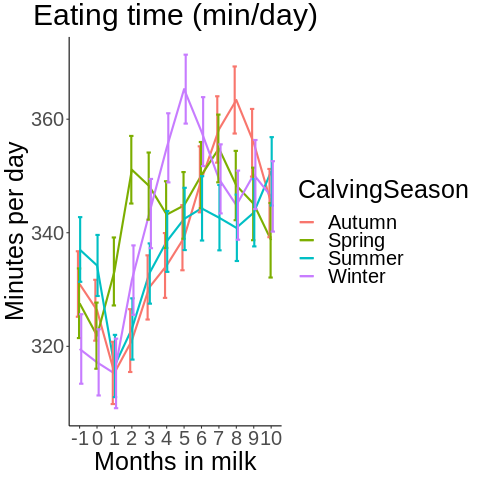

In [ ]:
%%R
dfPValues <- summary(LSMs)[[2]]
dfLMSs <- summary(LSMs)[[1]]
dfLMSs %>% 
  mutate(label = if_else(MonthsInMilk == max(as.numeric(MonthsInMilk)), as.character(CalvingSeason), NA_character_)) %>%
  ggplot(
  aes(
    x=MonthsInMilk,
    y=lsmean,
    group=CalvingSeason, 
    color=CalvingSeason)
    ) +
  geom_line(size=1) +  
  geom_errorbar(
    aes(ymin=asymp.LCL, 
        ymax=asymp.UCL), 
    width=1,
    size=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Eating time (min/day)", 
    y="Minutes per day" , 
    x = "Months in milk") +
  theme_bw() +
  theme(text=element_text(size=25),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(), 
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), 
        axis.line = element_line(colour = "black"))

In [ ]:
%%R
ggsave("/content/drive/Shareddrives/Bovi-Analytics/Projects/SenseOfSensors/DiurnalPattern/Figures122021/EatingTimeCalvingSeasonByMonthsInMilk.png", width = 10, height = 8)